In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.core.pylabtools import figsize
from scipy import stats
from scipy.stats import lognorm
import statsmodels.api as sm
from scipy.stats import shapiro
import math

%matplotlib inline

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей

In [64]:
data = pd.read_csv('C:\\Users\\kushn\\Documents\\Python_trainings\\Sber_projects\\Netflix\\Netflix Shows - Netflix Shows.csv', encoding='cp437')
data.head(10)

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,110,2013,97.0,80
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2017,91.0,80
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,110,2015,98.0,80
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,96.0,80


In [65]:

del data['ratingDescription'], data['user rating size']


In [66]:
data[data.duplicated()]

,title,rating,ratingLevel,release year,user rating score
50,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
52,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
53,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
56,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
57,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
...,...,...,...,...,...
991,Dawn of the Croods,TV-Y7,Suitable for children ages 7 and older,2017,72.0
992,Alpha and Omega: Dino Digs,TV-G,Suitable for all ages.,2016,NaN
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN


In [67]:
data[data.duplicated()].count()

title                500
rating               500
ratingLevel          474
release year         500
user rating score    349
dtype: int64

In [68]:
data.drop_duplicates(inplace = True)
data[data.duplicated()].count()

title                0
rating               0
ratingLevel          0
release year         0
user rating score    0
dtype: int64

### Так как мы удалили дубли по полному совпадению строк, убедимся в полной очистке данных от дублей.

In [69]:
titles = data.title.value_counts().loc[lambda x : x > 1].index.to_list()
titles

['Bordertown', 'Skins', 'Goosebumps', 'Star Wars: The Clone Wars']

In [70]:
data.loc[data['title'].isin(titles)].sort_values(by = 'title')

,title,rating,ratingLevel,release year,user rating score
167,Bordertown,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,86.0
449,Bordertown,TV-MA,For mature audiences. May not be suitable for...,2016,NaN
568,Goosebumps,TV-Y7,Suitable for children ages 7 and older,1998,88.0
632,Goosebumps,PG,"scary and intense creature action and images, ...",2015,90.0
151,Skins,TV-MA,For mature audiences. May not be suitable for...,2013,NaN
181,Skins,TV-MA,NaN,2017,NaN
504,Star Wars: The Clone Wars,PG,"sci-fi action violence throughout, brief langu...",2008,57.0
512,Star Wars: The Clone Wars,TV-PG,Parental guidance suggested. May not be suitab...,2014,93.0


### После очистки мы видим некоторые шоу остались с одинаковым наименованием. Однако по другим признакам эти шоу различаются.

In [71]:
data.rating.nunique()

13

In [72]:
rating_order = data['rating'].value_counts().index

## График фильмов по рейтинговым группам

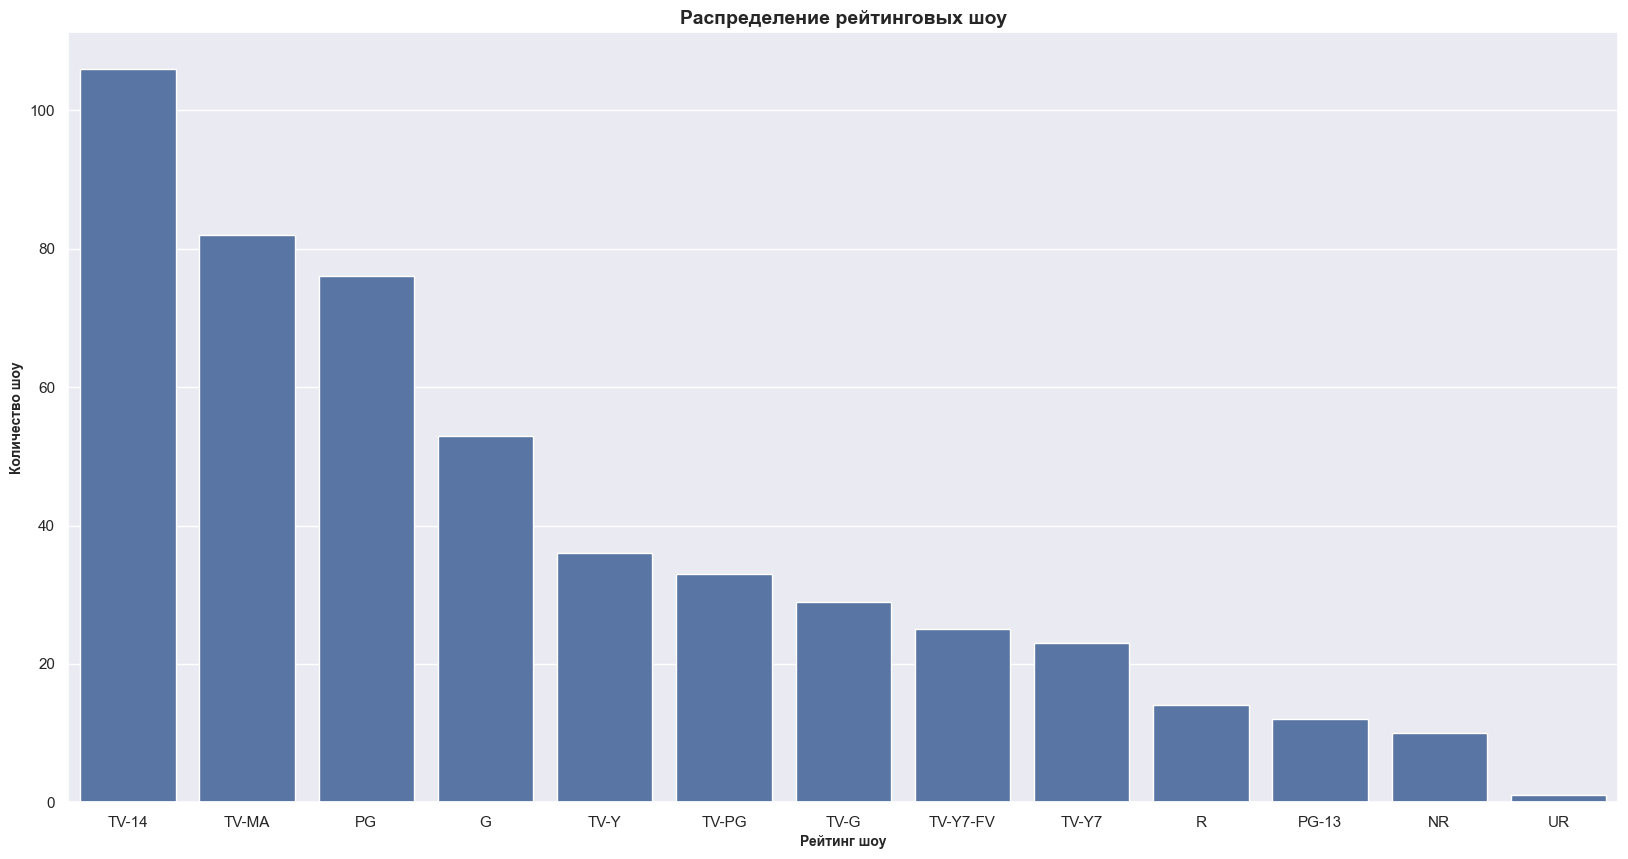

In [73]:
sns.set()

plt.figure(figsize=(20,10), facecolor = 'white')

sns.countplot(data = data, x = 'rating', order = rating_order)

plt.title("Распределение рейтинговых шоу",fontsize=14,fontweight='semibold')
plt.xlabel("Рейтинг шоу",fontsize=10,fontweight='semibold')
plt.ylabel("Количество шоу",fontsize=10,fontweight='semibold')
plt.show()

## График частоты оценок

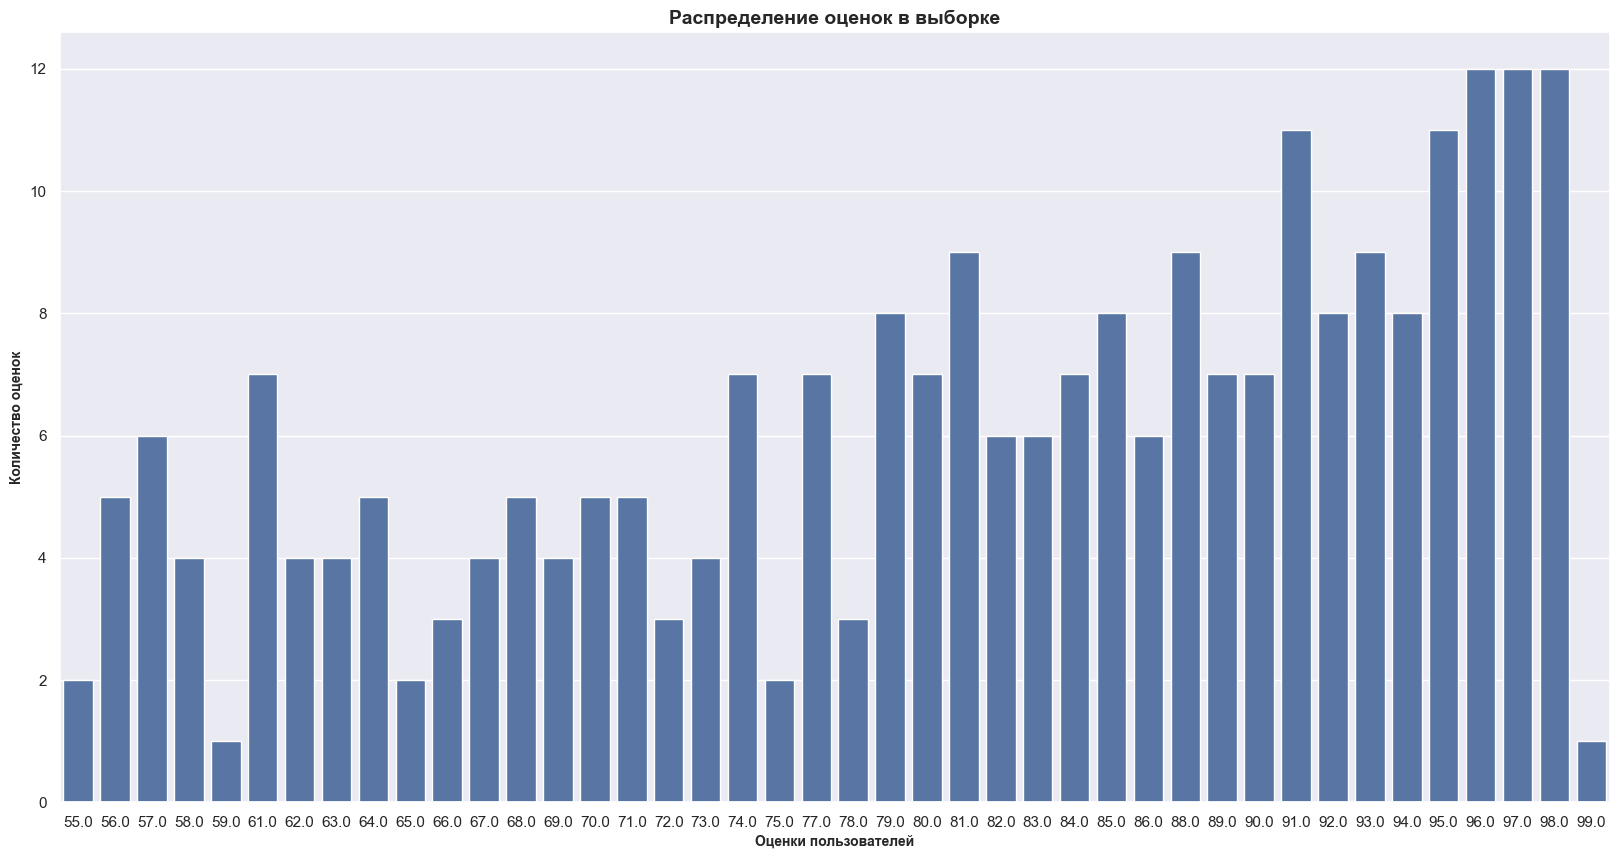

In [74]:
plt.figure(figsize=(20,10), facecolor = 'white')

sns.countplot(data = data, x = 'user rating score')

plt.title("Распределение оценок в выборке",fontsize=14,fontweight='semibold')
plt.xlabel("Оценки пользователей",fontsize=10,fontweight='semibold')
plt.ylabel("Количество оценок",fontsize=10,fontweight='semibold')
plt.show()

## Рассмотрим подробнее шоу с самыми популярными оценками.

In [75]:
# Cмотрим самые часто встречающиеся оценки
ratings = data['user rating score'].value_counts()\
.loc[lambda x : x == data['user rating score'].value_counts().max()].index.to_list()

In [76]:
ratings

[97.0, 96.0, 98.0]

In [77]:
# Оставляем только фильмы с оценками полученными выше. Группируем по рейтинговому шоу
rating_order = data.loc[data['user rating score'].isin(ratings)]\
.groupby(data['rating']).count()['user rating score'].sort_values(ascending = False).index

## График распределение оценок по рейтинговым группам

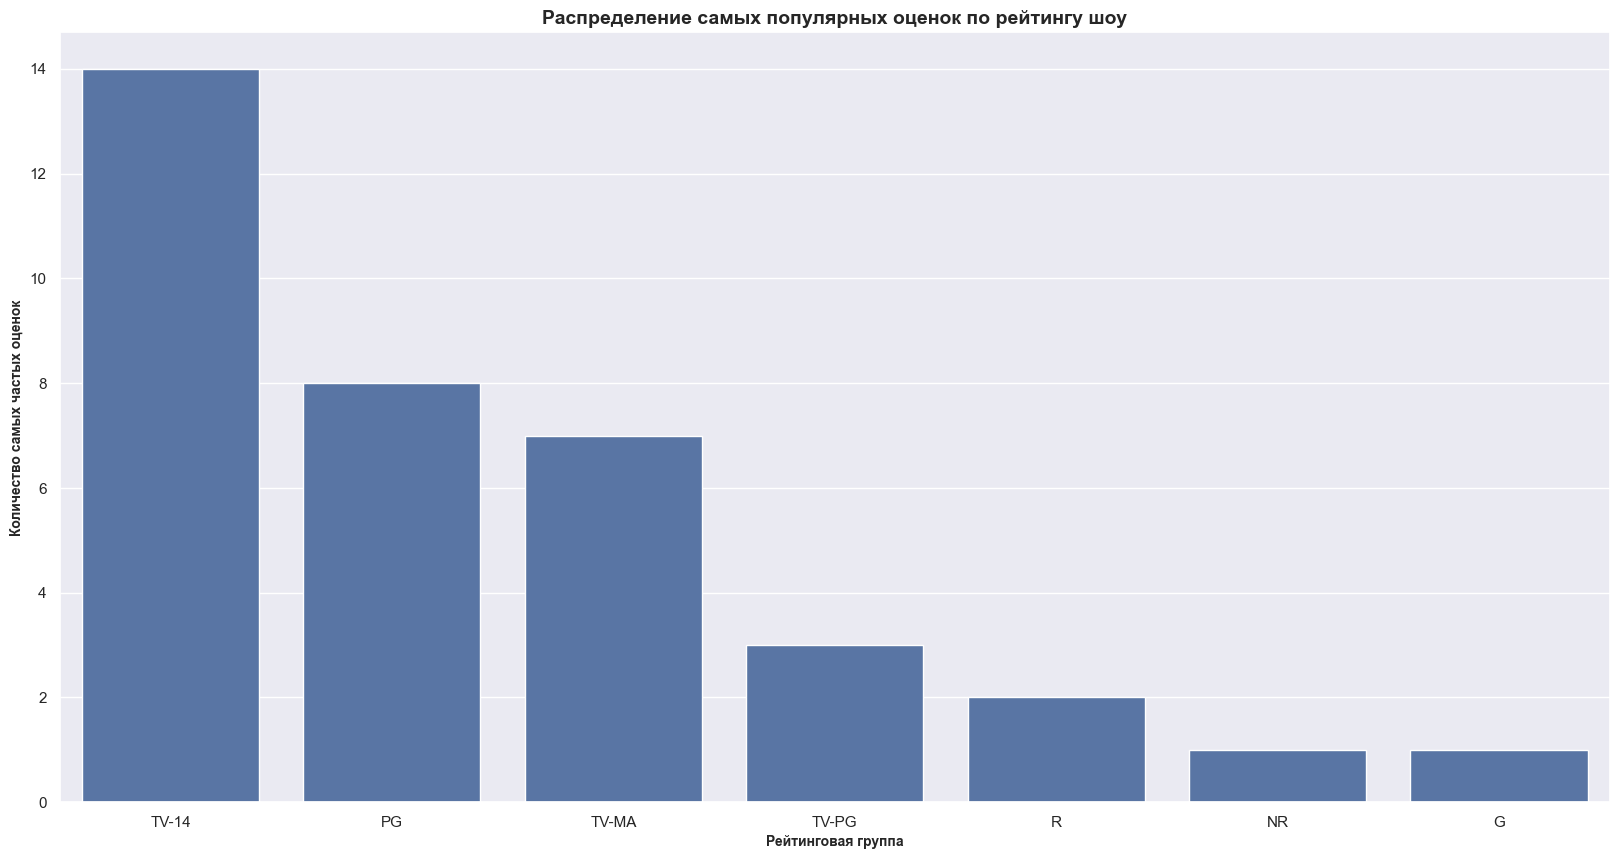

In [78]:
plt.figure(figsize=(20,10), facecolor = 'white')

sns.countplot(
    data = data.loc[data['user rating score'].isin(ratings)],
     x = 'rating',
     order = data.loc[data['user rating score'].isin(ratings)].rating.value_counts().index
     )

plt.title("Распределение самых популярных оценок по рейтингу шоу",fontsize=14,fontweight='semibold')
plt.xlabel("Рейтинговая группа",fontsize=10,fontweight='semibold')
plt.ylabel("Количество самых частых оценок",fontsize=10,fontweight='semibold')
plt.show()

In [92]:
release_order = data.loc[data['user rating score'].isin(ratings)]\
.groupby(data['release year']).count()['user rating score'].sort_values(ascending = True).index

In [93]:
print(*release_order)

1993 2001 2003 2008 2010 2013 2012 2017 2015 2016


## График распределение оценок по годам

C:\Users\kushn\AppData\Local\Temp\ipykernel_12864\2856622593.py:9: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis="both", nbins=20, tight=True)


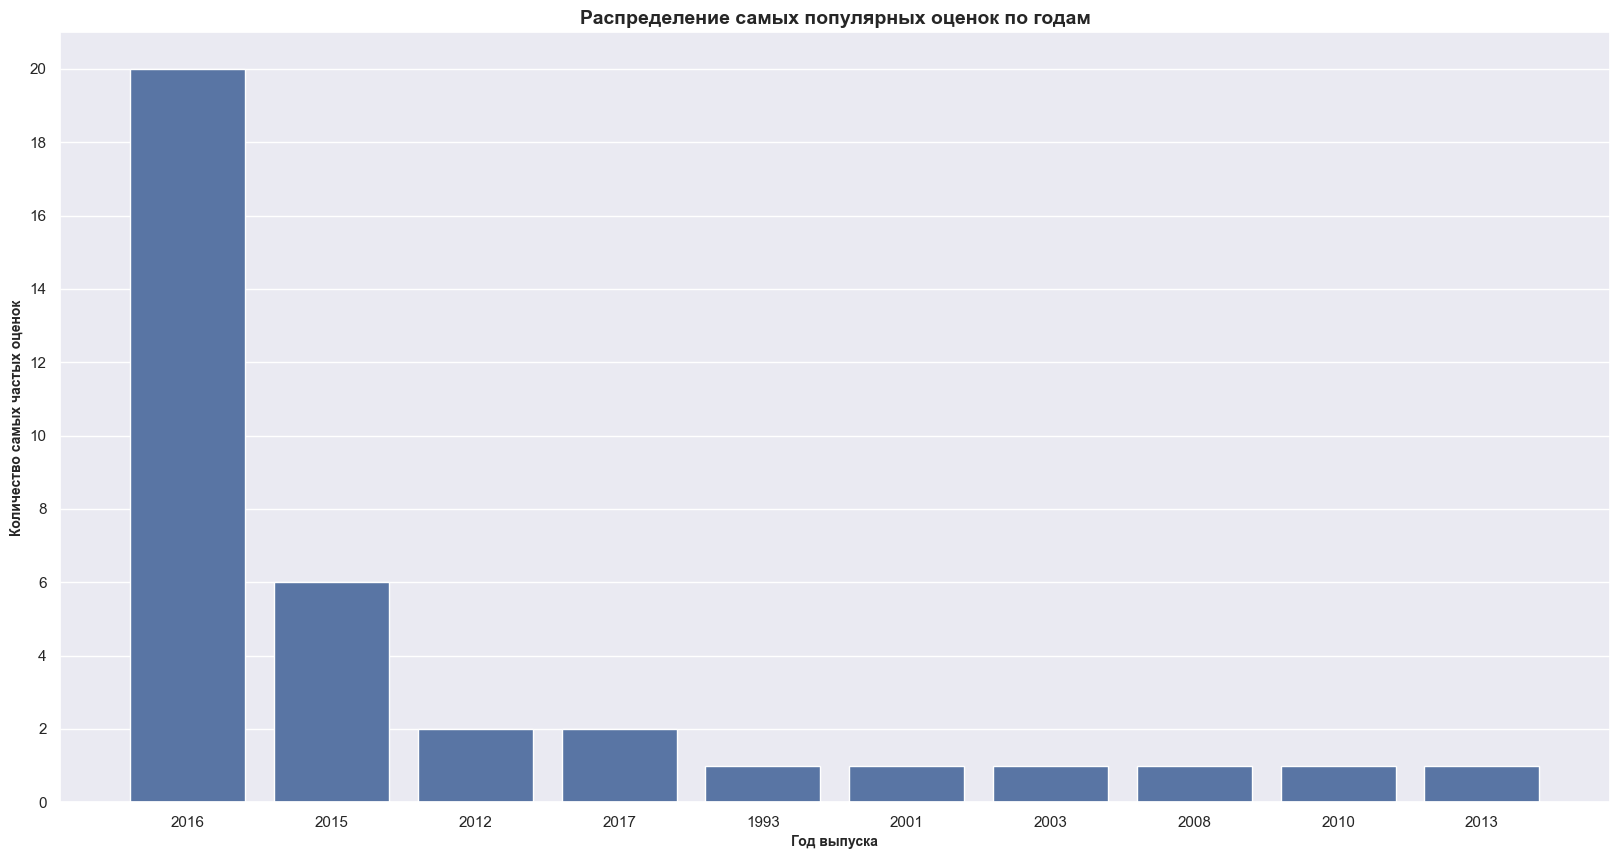

In [81]:
plt.figure(figsize=(20,10), facecolor = 'white')

sns.countplot(
    data = data.loc[data['user rating score'].isin(ratings)],
     x = 'release year',
    order = release_order
     )

plt.locator_params(axis="both", nbins=20, tight=True)

plt.title("Распределение самых популярных оценок по годам",fontsize=14,fontweight='semibold')
plt.xlabel("Год выпуска",fontsize=10,fontweight='semibold')
plt.ylabel("Количество самых частых оценок",fontsize=10,fontweight='semibold')
plt.show()

In [82]:
# Распределяем оценки на диапазоны для лучшей интерпретируемости
all_ratings = data.sort_values(by = 'user rating score', ascending=False)

# Добавляем в нашу датасет новую колонку range с наименованием диапазона к которому принадлежит оценка
all_ratings['range'] = pd.cut(all_ratings['user rating score'].dropna().astype(int), bins=6, precision=0, labels=['Very Low','Low','Middle','High','Very High','Super'])


# Получаем диапазоны с количеством оценок в них.
interval_score = all_ratings['range'].value_counts(sort=False)
interval_score

range
Very Low     29
Low          27
Middle       33
High         46
Very High    48
Super        73
Name: count, dtype: int64

In [83]:
# Таблица оценок и диапазонов (индексы: название диапазона и количество значений в нем)
score_range = data['user rating score'].unique()
score_range.sort()
print(data['user rating score'].nunique())

gr_range = np.split(score_range[~np.isnan(score_range)],6)

score_range_df = pd.DataFrame(gr_range, columns = ['3-','2-','1-','m','1+','2+','3+' ]) # (3-) нижняя граница, (3+) - верхняя(например: Super(3-))
score_range_df = score_range_df.set_index([interval_score.index, interval_score.values])
score_range_df

42


,,3-,2-,1-,m,1+,2+,3+
range,,,,,,,,
Very Low,29,55.0,56.0,57.0,58.0,59.0,61.0,62.0
Low,27,63.0,64.0,65.0,66.0,67.0,68.0,69.0
Middle,33,70.0,71.0,72.0,73.0,74.0,75.0,77.0
High,46,78.0,79.0,80.0,81.0,82.0,83.0,84.0
Very High,48,85.0,86.0,88.0,89.0,90.0,91.0,92.0
Super,73,93.0,94.0,95.0,96.0,97.0,98.0,99.0


## Распределение оценок по категориями:  Very Low, Low, Avarage, High,Very High, Super

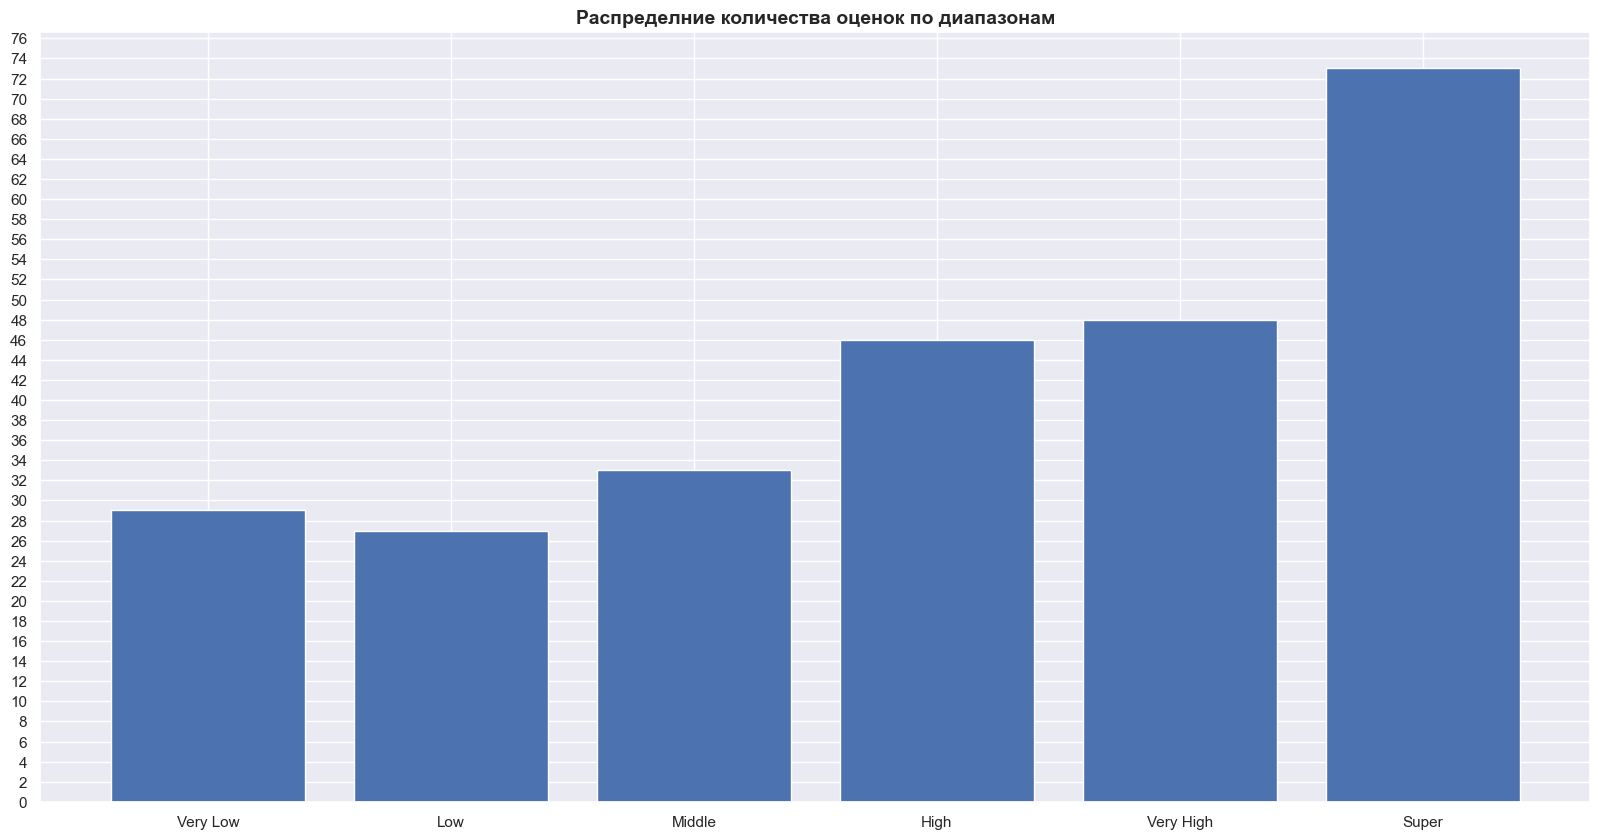

In [85]:
# График распределния количества оценок по диапазонам.
plt.figure(figsize=(20,10), facecolor = 'white')


plt.bar(score_range_df.index.get_level_values(0), score_range_df.index.get_level_values(1))
plt.locator_params(axis="y", nbins=50, tight=True)

plt.title("Распределние количества оценок по диапазонам",fontsize=14,fontweight='semibold')
plt.show()

# Выводы (1-я часть)
***Выводы:***
- Чаще всего пользователи ставят оценки 96-98 баллов;
- Самое большое число таких оценок получают шоу с рейтингом TV-14;
- Оценки 96-98 баллов пользователи чаще всего ставили в 2016 году;
- Пользователи на сервисе склонны ставить оценки из категории High и выше.

In [ ]:
print('Количество уникальных значений:', len(data))
print('Количество рейтинговых групп:', data['rating'].nunique())

print('Процент шоу имеющих оценку: {} %'.format(
    round(data['user rating score'].notnull().sum()/len(data) * 100, 2)))

print('Процент шоу с высокими оценками: {} %'.format(
    round((interval_score['Super'] + interval_score['High'] + interval_score['Very High'])\
          /data['user rating score'].notnull().sum() * 100, 2)))

print('Процент оценок в интервале Super: {} %'.format(
    round(interval_score['Super']/data['user rating score'].notnull().sum() * 100,1)))

print('Процент шоу с максимальным количеством оценок: {} %'.format(
    round(data.loc[data['user rating score'].isin(ratings)].groupby(data['rating']).count()\
          ['user rating score'].sum()/data['user rating score'].notnull().sum() * 100,1)))

Количество уникальных значений: 500
Количество рейтинговых групп: 13
Процент шоу имеющих оценку: 51.2 %
Процент шоу с высокими оценками: 65.23 %
Процент оценок в интервале Super: 28.5 %
Процент шоу с максимальным количеством оценок: 14.1 %


In [ ]:
rating = pd.DataFrame(data['user rating score'].describe()).T

In [ ]:
rating.insert(loc= 2, column='median', value=data['user rating score'].median())

|index|user rating score|
|---|---|
|count|256\.0|
|mean|81\.0|
|median|84\.0|
|std|13\.0|
|min|55\.0|
|25%|71\.0|
|50%|84\.0|
|75%|93\.0|
|max|99\.0|

## График распределения оценок

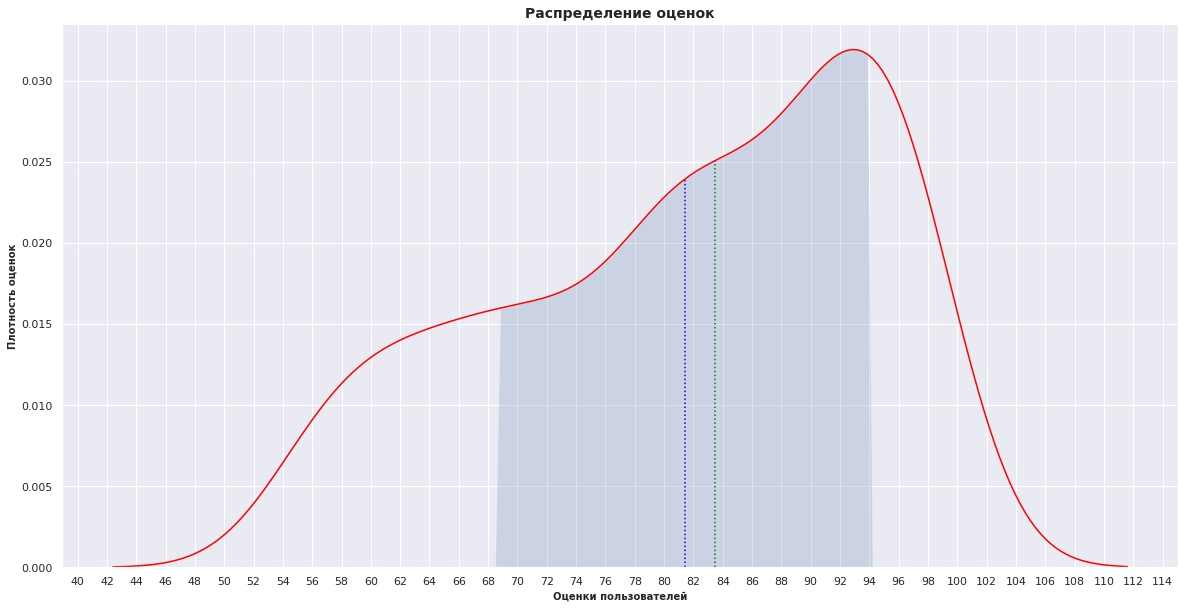

In [ ]:
# График распределения оценок. Мода, медиана, стандартное отклонение.
x = data['user rating score']
fig, ax = plt.subplots(figsize=(20, 10), facecolor = 'white')
sns.kdeplot(x, color='red', ax=ax)
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
Mean = x.mean()
Median = x.median()
sdev = x.std()
left = Mean - sdev
right = Mean + sdev
ax.vlines(Mean, 0, np.interp(Mean, xs, ys), color='blue', ls=':')
ax.vlines(Median, 0, np.interp(Median, xs, ys), color='green', ls=':')
ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, alpha=0.2)
plt.locator_params(axis="x", nbins=40, tight=True)

plt.title("Распределение оценок",fontsize=14,fontweight='semibold')
plt.xlabel("Оценки пользователей",fontsize=10,fontweight='semibold')
plt.ylabel("Плотность оценок",fontsize=10,fontweight='semibold')
plt.show()

## Характеристики средних значений оценок


**Распределение оценок имеет следующие параметры**
- среднее: 81
- медиана: 84
- стандартное отклонение: 13
- минимум: 55
- максимум: 99

**Из данного распределения можно сделать следующие выводы:**
- распределение имеет правостороннюю асимметрию
- пользователи предпочитают оценивать фильмы, которые им понравились
- среднее значение и медиана не совпадают
- среднее значение более чувствительно к выбросам
- медиана в данном случае луше описывает распределение

In [94]:
# годы запуска шоу
showyears = data['release year'].drop_duplicates().dropna().describe()
print(int(showyears['min']),'-',int(showyears['max']))

1940 - 2017


## График шоу по годам

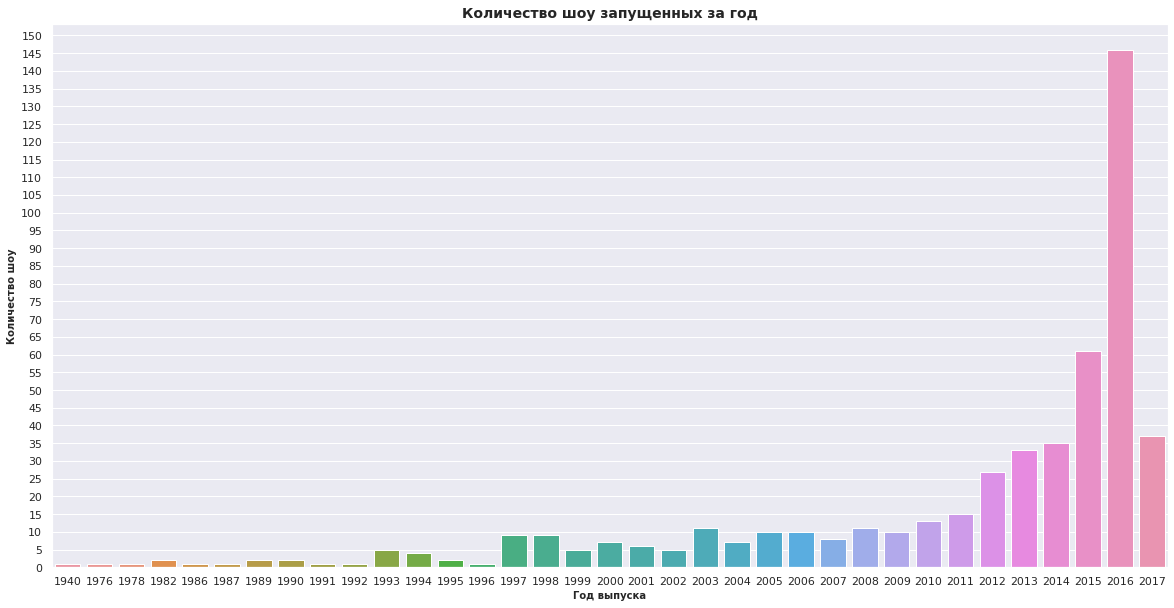

In [ ]:
plt.figure(figsize=(20,10), facecolor = 'white')
sns.countplot(data = data, x = 'release year')
plt.locator_params(axis="y", nbins=40, tight=True)

plt.title("Количество шоу запущенных за год",fontsize=14,fontweight='semibold')
plt.ylabel("Количество шоу",fontsize=10,fontweight='semibold')
plt.xlabel("Год выпуска",fontsize=10,fontweight='semibold')
plt.show()

## Выбросы по количеству шоу в год

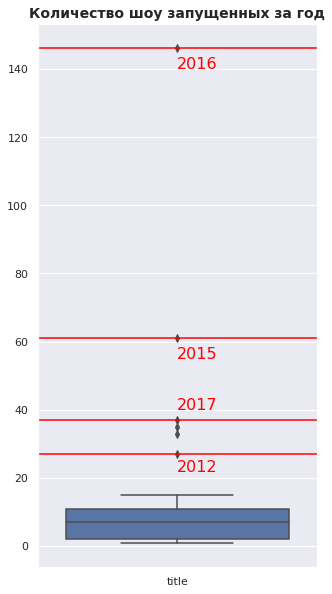

In [ ]:
fig, ax = plt.subplots(figsize=(5,10))

sns.boxplot(data=data[['release year','title']].groupby('release year').count())

plt.axhline(y=146, color='red', linestyle='-')
plt.text(0, 140, '2016', color = 'red', fontsize=16)

plt.axhline(y=61, color='red', linestyle='-')
plt.text(0, 55, '2015', color = 'red', fontsize=16)

plt.axhline(y=37, color='red', linestyle='-')
plt.text(0, 40, '2017', color = 'red', fontsize=16)

plt.axhline(y=27, color='red', linestyle='-')
plt.text(0, 22, '2012', color = 'red', fontsize=16)

plt.title("Количество шоу запущенных за год",fontsize=14,fontweight='semibold')
plt.show()

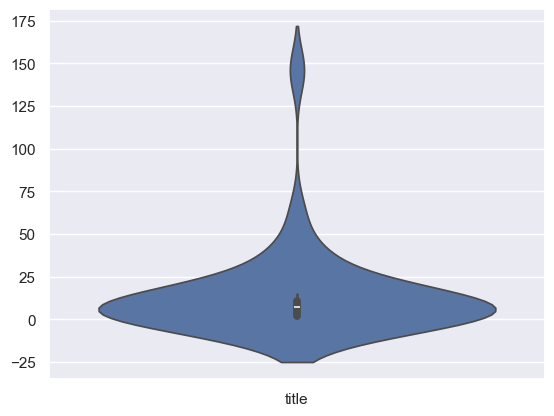

In [95]:
sns.violinplot(data=data[['release year','title']].dropna().groupby('release year').count());

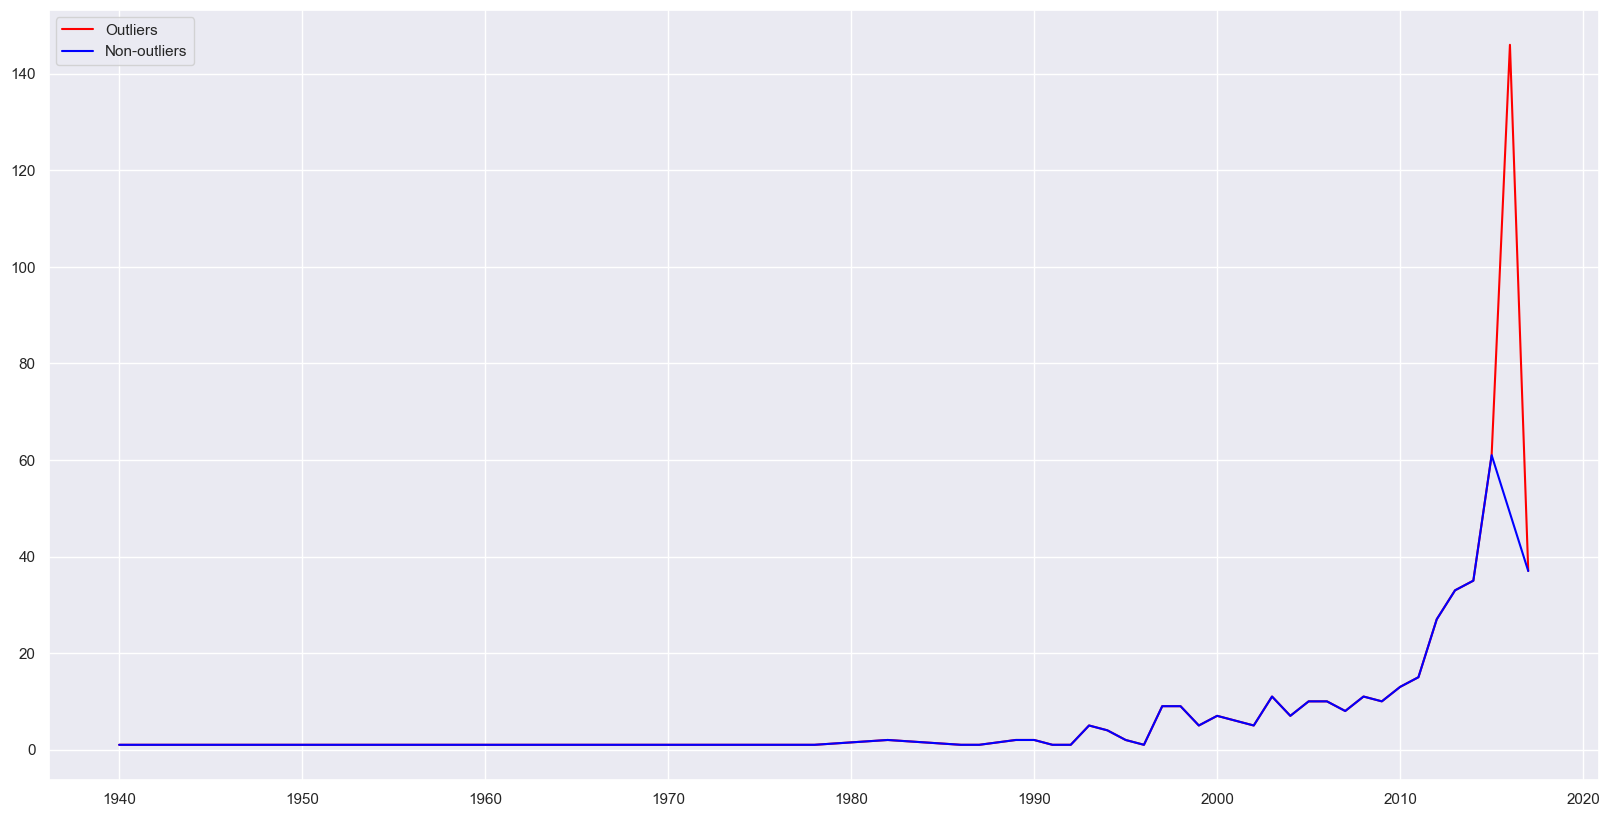

In [96]:
# выбросы по квантилям
plt.figure(figsize=(20,10), facecolor = 'white')
i = data[['release year','title']].groupby('release year').count()
x =i['title']
outliers = x[x.between(x.quantile(.01), x.quantile(.99))]
plt.plot(x, 'red', label='Outliers')
plt.plot(outliers, 'blue', label='Non-outliers')
plt.legend()
plt.show()

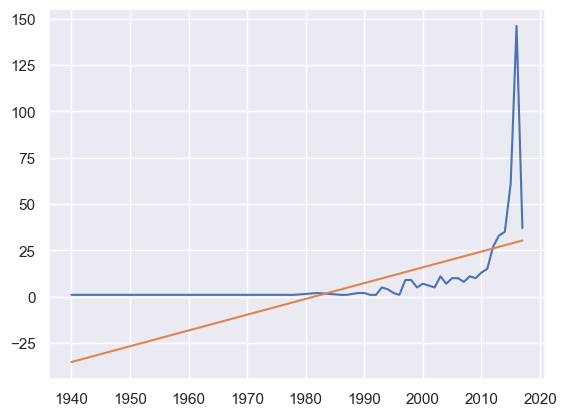

In [105]:
year_bar = data[['release year','title']].groupby('release year').count()

x = year_bar.reset_index()['release year']
y = year_bar.reset_index()['title']
p = np.polyfit(x,y, 1)
ya = np.polyval(p, x)

plt.plot(x, y)
plt.plot(x, ya)

plt.show()
year_approx = year_bar.rename(columns={'title':'source'})
year_approx['line']=ya
year_approx['delta']=year_approx.source-year_approx.line
del(year_approx['line'])



## Выбросы по рейтнигам в году

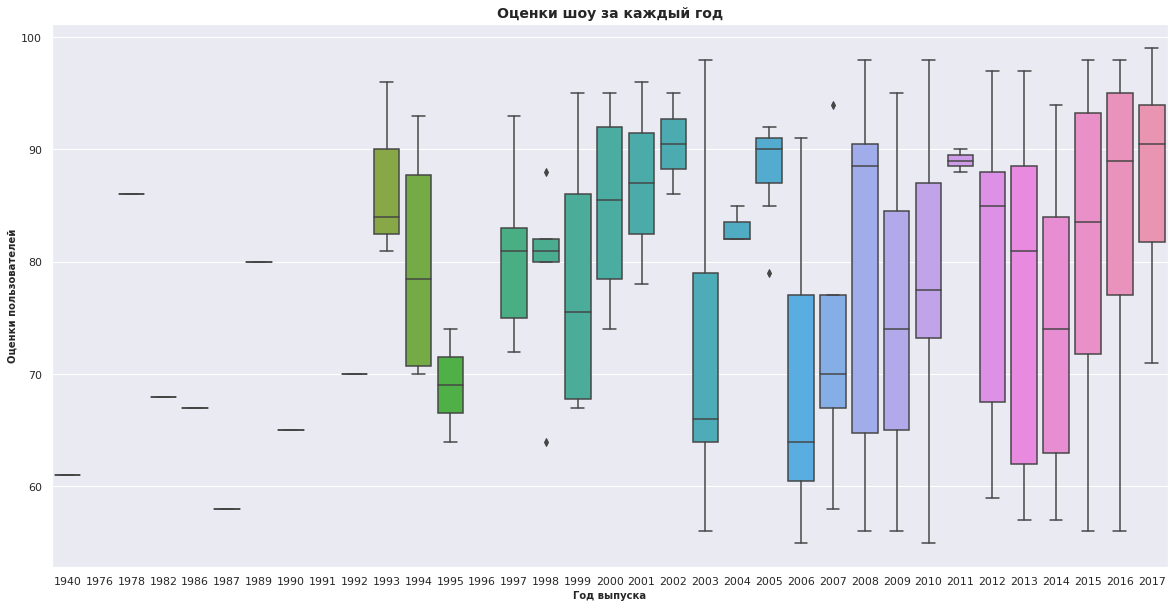

In [ ]:
plt.figure(figsize=(20,10), facecolor = 'white')

sns.boxplot(
    data=data,
     y="user rating score",
      x="release year"
      )

plt.title("Оценки шоу за каждый год",fontsize=14,fontweight='semibold')
plt.xlabel("Год выпуска",fontsize=10,fontweight='semibold')
plt.ylabel("Оценки пользователей",fontsize=10,fontweight='semibold')
plt.show()

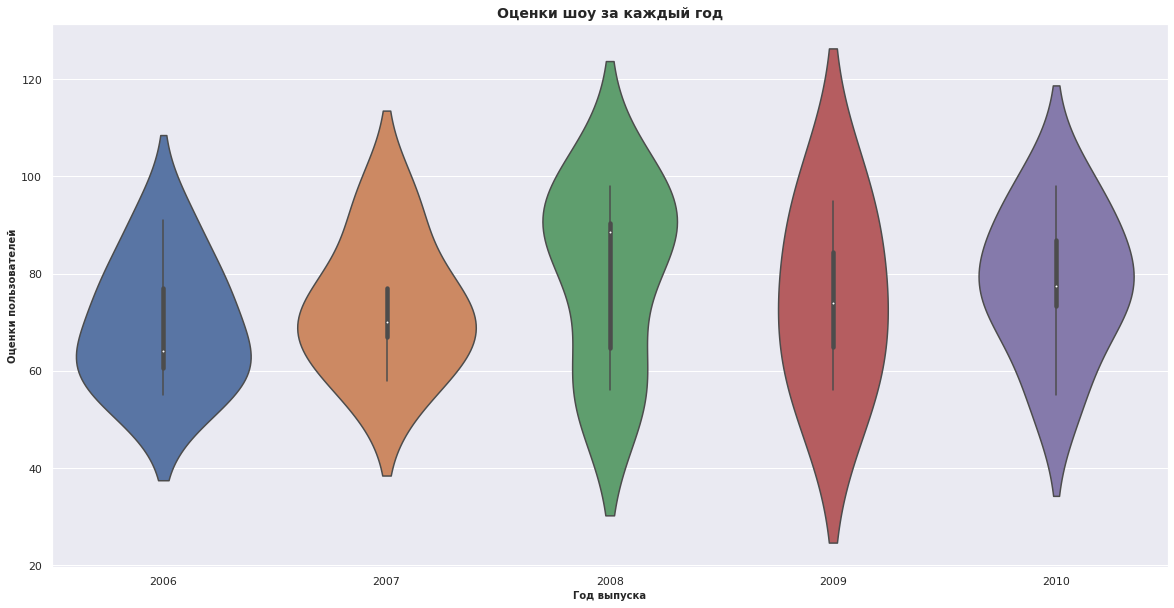

In [ ]:
plt.figure(figsize=(20,10), facecolor = 'white')

sns.violinplot(
    data=data[(data['release year']  > 2005) & (data['release year'] < 2011)],
     y="user rating score",
      x="release year"
      )

plt.title("Оценки шоу за каждый год",fontsize=14,fontweight='semibold')
plt.xlabel("Год выпуска",fontsize=10,fontweight='semibold')
plt.ylabel("Оценки пользователей",fontsize=10,fontweight='semibold')
plt.show()

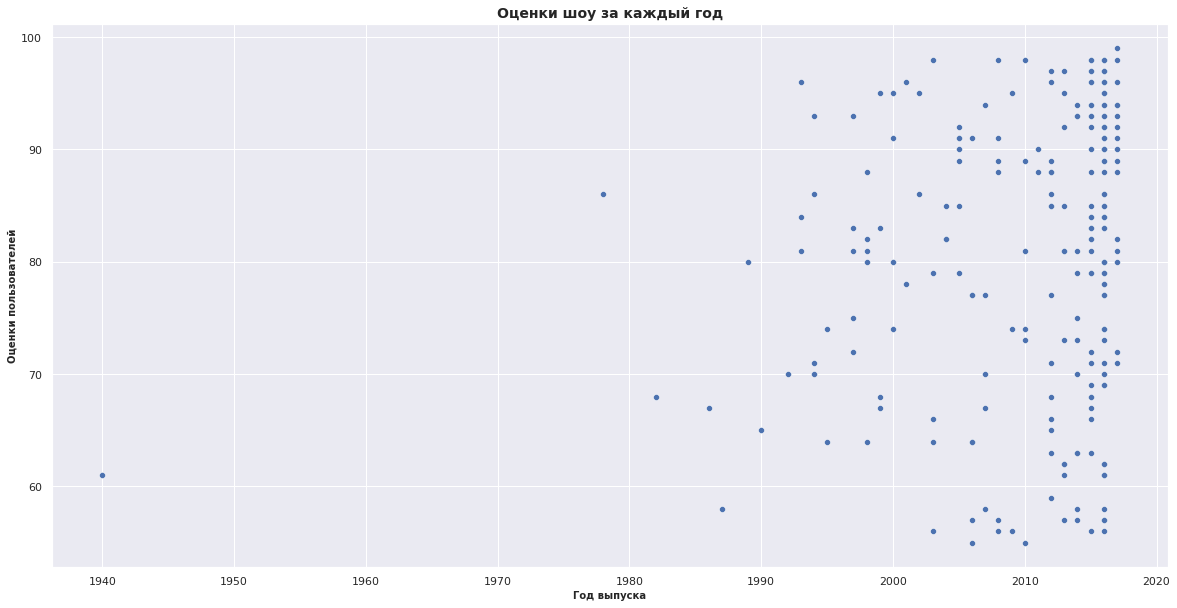

In [ ]:
# частота оценок по годам
plt.figure(figsize=(20,10), facecolor = 'white')

sns.scatterplot(
    data=data,
     y="user rating score",
      x="release year"
      )

plt.title("Оценки шоу за каждый год",fontsize=14,fontweight='semibold')
plt.xlabel("Год выпуска",fontsize=10,fontweight='semibold')
plt.ylabel("Оценки пользователей",fontsize=10,fontweight='semibold')
plt.show()

***Выводы:***
- В датасете представлены 35 уникальных значений года выпуска;
- Годы выпуска шоу находятся в интервале 1940-2017 годов;
- Рост количества шоу наблюдается с 2009 по 2016 год;
- По количеству фильмов за год аномальными являются следующие года 2012, 2013, 2014, 2015, 2016, 2017 года;
- Выбросы по рейтингу наблюдаются в 1998, 2005, 2007 годах.

Сравнение 2016 и 2017 годов

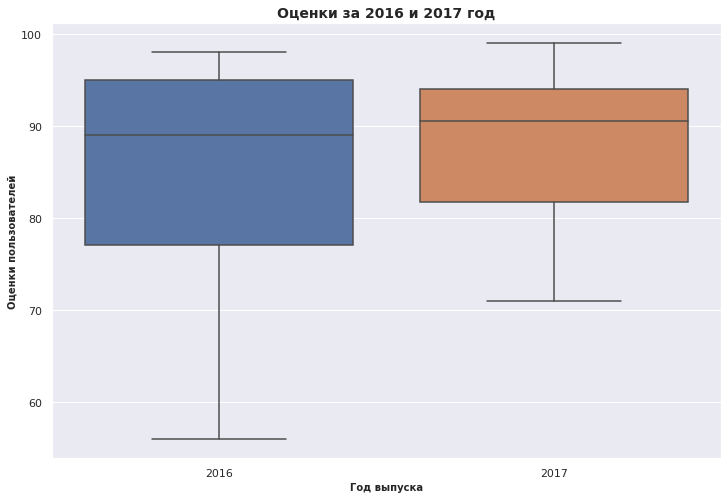

In [ ]:
plt.figure(figsize=(12,8), facecolor = 'white')

sns.boxplot(
    data=data.loc[data["release year"] >= 2016],
     y="user rating score",
     x="release year"
     )

plt.title("Оценки за 2016 и 2017 год",fontsize=14,fontweight='semibold')
plt.xlabel("Год выпуска",fontsize=10,fontweight='semibold')
plt.ylabel("Оценки пользователей",fontsize=10,fontweight='semibold')
plt.show()

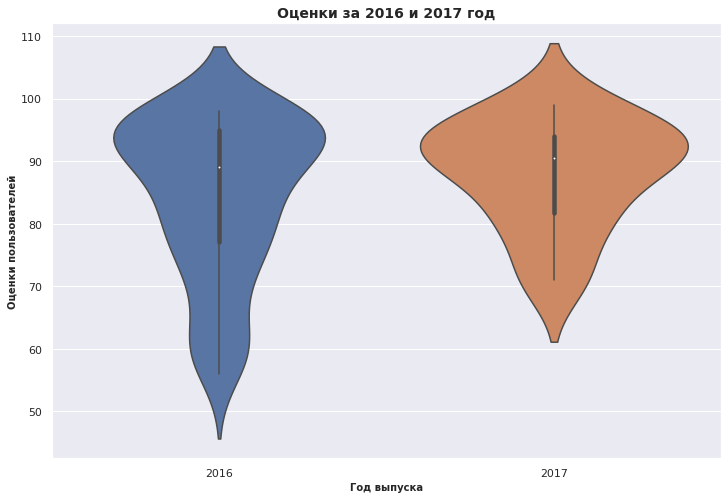

In [ ]:
plt.figure(figsize=(12,8), facecolor = 'white')

sns.violinplot(data=data.loc[data["release year"] >= 2016],y="user rating score",x="release year")

plt.title("Оценки за 2016 и 2017 год",fontsize=14,fontweight='semibold')
plt.xlabel("Год выпуска",fontsize=10,fontweight='semibold')
plt.ylabel("Оценки пользователей",fontsize=10,fontweight='semibold')
plt.show()

## График распределение оценок за 2016

In [ ]:
# Расчет коэффициентов асимметрии и эксцессов для распределений оценок 2016, 2017 годов
dt_2016 = data[data['release year'] == 2016][['release year','user rating score']]
dt_2017 = data[data['release year'] == 2017][['release year','user rating score']]
print('Ассиметрия 2016:', round(dt_2016['user rating score'].skew(), 2))
print('Экcцесс 2016:', round(dt_2016['user rating score'].kurt(), 2))

print('Ассиметрия 2017:',round(dt_2017['user rating score'].skew(), 2))
print('Экcцесс 2017:', round(dt_2017['user rating score'].kurt(), 2))

Ассиметрия 2016: -0.81
Экcцесс 2016: -0.51
Ассиметрия 2017: -0.84
Экcцесс 2017: -0.18


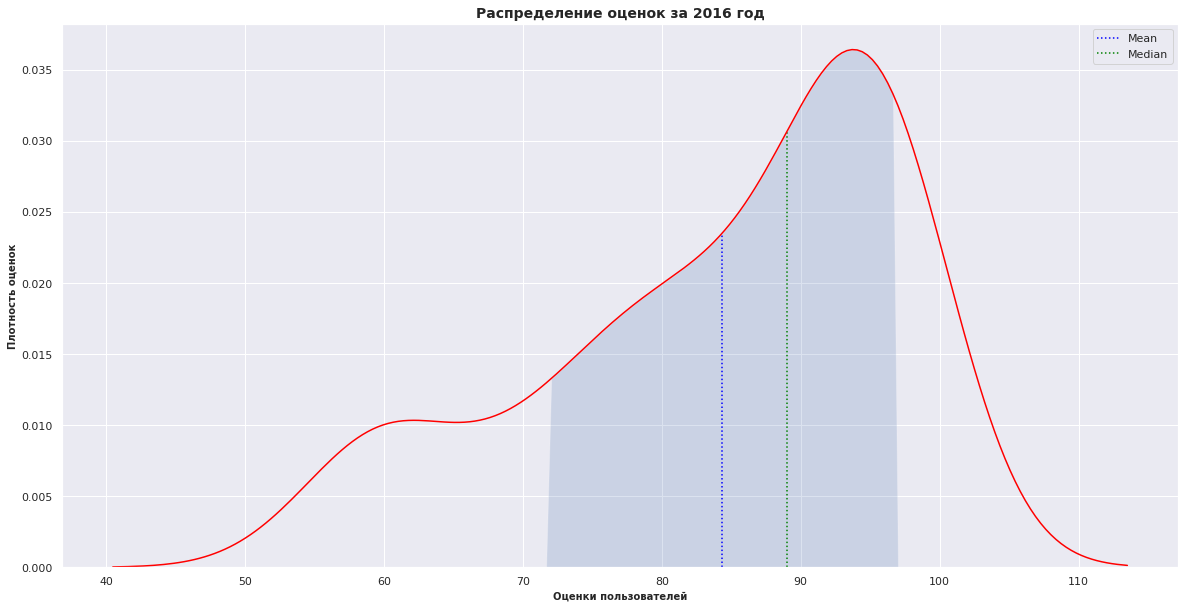

In [ ]:
# Распределение оценок за 2016
x = dt_2016['user rating score']
fig, ax = plt.subplots(figsize=(20, 10), facecolor = "white")
sns.kdeplot(x, color='red', ax=ax)
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
Mean = x.mean()
Median = x.median()
#Mode = x.mode()
sdev = x.std()
left = Mean - sdev
right = Mean + sdev
plt.title("Распределение оценок за 2016 год",fontsize=14,fontweight='semibold')
plt.xlabel("Оценки пользователей",fontsize=10,fontweight='semibold')
plt.ylabel("Плотность оценок",fontsize=10,fontweight='semibold')
ax.vlines(Mean, 0, np.interp(Mean, xs, ys), label='Mean', color='blue', ls=':')
ax.vlines(Median, 0, np.interp(Median, xs, ys),label='Median', color='green', ls=':')
ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, alpha=0.2)
plt.legend()
plt.show()

## График распределение оценок за 2017

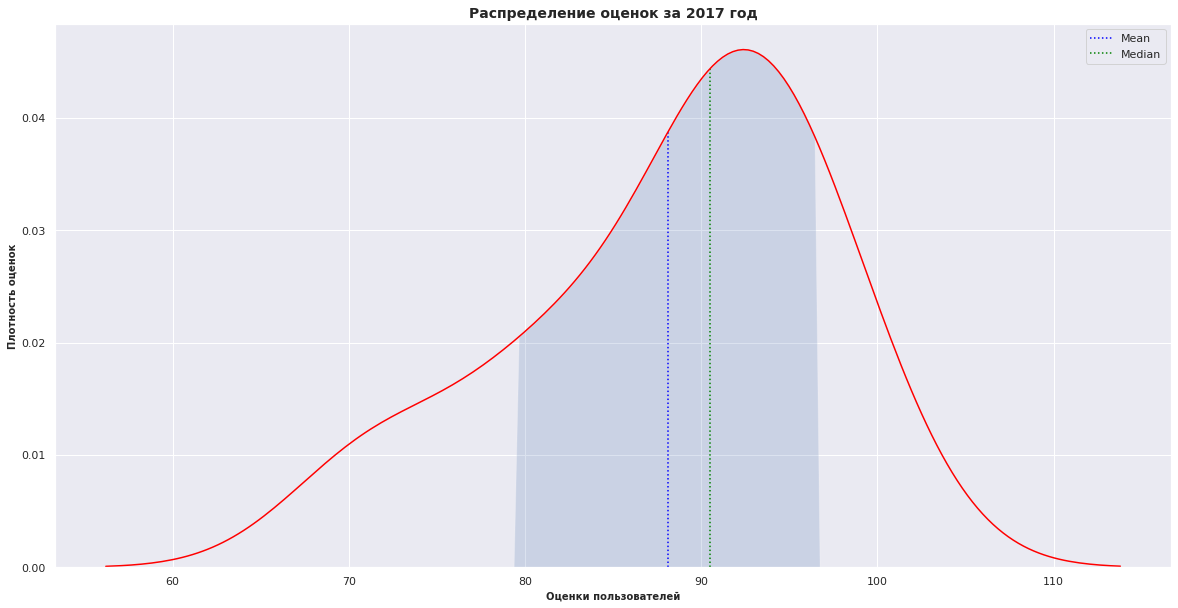

In [ ]:
# Распределение оценок за 2017
x = dt_2017['user rating score']
fig, ax = plt.subplots(figsize=(20, 10), facecolor = "white")
sns.kdeplot(x, color='red', ax=ax)
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
Mean = x.mean()
Median = x.median()
#Mode = x.mode()
sdev = x.std()
left = Mean - sdev
right = Mean + sdev
plt.title("Распределение оценок за 2017 год",fontsize=14,fontweight='semibold')
plt.xlabel("Оценки пользователей",fontsize=10,fontweight='semibold')
plt.ylabel("Плотность оценок",fontsize=10,fontweight='semibold')

ax.vlines(Mean, 0, np.interp(Mean, xs, ys), label='Mean', color='blue', ls=':')
ax.vlines(Median, 0, np.interp(Median, xs, ys),label='Median', color='green', ls=':')
ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, alpha=0.2)
plt.legend()
plt.show()

## Сравнение  2016 и 2017 года с помощью t критерия.

In [ ]:
# Гипотеза Н0, что оценки в 2016 году были такие же как и в 2017.
data_stats = data.loc[(data['release year'] >= 2016)].groupby('release year')\
.agg({'user rating score': ['mean', 'median','max', 'min', 'var', 'count']}).round().dropna()
stats

<module 'scipy.stats' from '/usr/local/lib/python3.8/dist-packages/scipy/stats/__init__.py'>

In [ ]:
Ttest = stats.ttest_ind(
     data.loc[(data['release year'] == 2016)]['user rating score'].dropna().to_numpy(),
     data.loc[(data['release year'] == 2017)]['user rating score'].dropna().to_numpy(),
     equal_var=False
     )
Ttest

Ttest_indResult(statistic=-1.5002429572314735, pvalue=0.1445052299709164)

In [ ]:
data.loc[(data['release year'] == 2017)]['user rating score'].dropna().to_numpy()

array([91., 98., 82., 94., 99., 89., 92., 90., 80., 96., 93., 71., 94.,
       81., 88., 72.])

In [ ]:
mu_2016 = data_stats["user rating score"]['mean'][2016]
mu_2017 = data_stats["user rating score"]['mean'][2017]
n_2016 = data_stats["user rating score"]['count'][2016]
n_2017 = data_stats["user rating score"]['count'][2017]
vr_2016 = data_stats["user rating score"]['var'][2016]
vr_2017 = data_stats["user rating score"]['var'][2017]

In [ ]:
st = stats.t(100)
alpha=0.05
print(f't-тест:{list(Ttest)[0]:.2f} q-value:{list(Ttest)[1]:.2f}')
print(f'Критическая область: ({float("-inf")} ; {st.ppf(alpha/2):.2f}) ({st.ppf(1-alpha/2):.2f} ; {float("inf")})')

t-тест:-1.50 q-value:0.14
Критическая область: (-inf ; -1.98) (1.98 ; inf)


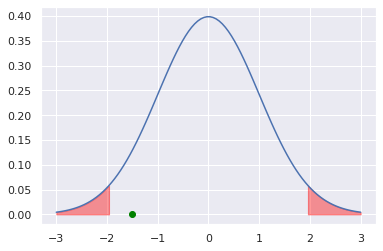

In [ ]:
# Визуализация t-теста (2016_vs_2017)
n01 = stats.norm(0,1)
to_plot = np.linspace(-3,3,100)
plt.plot(to_plot, n01.pdf(to_plot))

left_crit = np.linspace(-3, n01.ppf(alpha/2))
right_crit = np.linspace(n01.ppf(1-alpha/2), 3)
plt.fill_between(left_crit, n01.pdf(left_crit), alpha=0.4, color="red")
plt.fill_between(right_crit, n01.pdf(right_crit), alpha=0.4, color="red")
plt.scatter(list(Ttest)[0], 0, color="green")

## Сравнение 2016 и 2017 года с помощью Z критерия.

In [ ]:
Z = (mu_2016-mu_2017)/(np.sqrt(vr_2016/n_2016 + vr_2017/n_2017))

Z_crit_pos = stats.norm.ppf(1-.05/2)
Z_crit_neg = -Z_crit_pos
print(f'Z-тест: {Z:.2f}')
print(f'Критическая область:({float("-inf")} ; {Z_crit_neg:.2f}) ({Z_crit_pos:.2f} ; {float("inf")})')

Z-тест: -1.57
Критическая область:(-inf ; -1.96) (1.96 ; inf)


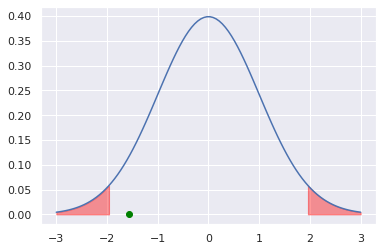

In [ ]:
# Визуализация Z-теста (2016_vs_2017)
n01 = stats.norm(0,1)
to_plot = np.linspace(-3,3,100)
plt.plot(to_plot, n01.pdf(to_plot))

left_crit = np.linspace(-3, n01.ppf(alpha/2))
right_crit = np.linspace(n01.ppf(1-alpha/2), 3)
plt.fill_between(left_crit, n01.pdf(left_crit), alpha=0.4, color="red")
plt.fill_between(right_crit, n01.pdf(right_crit), alpha=0.4, color="red")
plt.scatter(Z, 0, color="green")

- В 2017 году в среднем оценки выше чем в 2016;
- При оценке Z-критерия и t-критерия мы не можем однозначно сделать вывод о том, что 2016 год успешнее 2017.

## Распределения фильмов по группам 

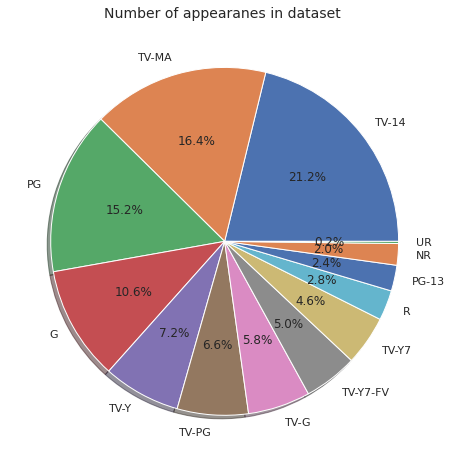

In [ ]:
plt.figure(figsize=(12,8), facecolor = 'white')

plt.pie(
    data.rating.value_counts(),
    shadow=True,
    autopct='%.1f%%',
    labels=data.rating.value_counts().index
)

plt.title('Number of appearanes in dataset ', size=14)

plt.show()

In [ ]:
# Построим таблицу средних оценок по группам
# 50% (256/500) шоу не имеют оценок
# Заполнять NaN ни 0, ни средними некорректно
# NaN может свидетельствовать как о потери данных, так и о неоцененности (т.е. провальности) шоу
# Используем только non-null значения

dt_02 = data[['rating','user rating score']]
gr_rating = dt_02.groupby('rating').agg({'user rating score':['mean']}).round()
dt_04 = pd.DataFrame(gr_rating.to_records())
dt_04.rename(columns={"('user rating score', 'mean')": 'mean'}, inplace=True)

In [ ]:
dt_02.fillna(0, inplace = True)
count_group = dt_02.groupby('rating').agg({'user rating score':['count']})
dt_03 = pd.DataFrame(count_group.to_records())
dt_03.rename(columns={"('user rating score', 'count')": 'count'}, inplace=True)

rating_data = pd.merge(dt_04, dt_03).assign(percentage=lambda x: (x['count'] / 500).round(2))
rating_data

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,rating,mean,count,percentage
0,G,74.0,53,0.11
1,NR,77.0,10,0.02
2,PG,84.0,76,0.15
3,PG-13,71.0,12,0.02
4,R,85.0,14,0.03
5,TV-14,83.0,106,0.21
6,TV-G,74.0,29,0.06
7,TV-MA,85.0,82,0.16
8,TV-PG,84.0,33,0.07
9,TV-Y,75.0,36,0.07


## Пузырькова диаграмма распределения шоу по группам

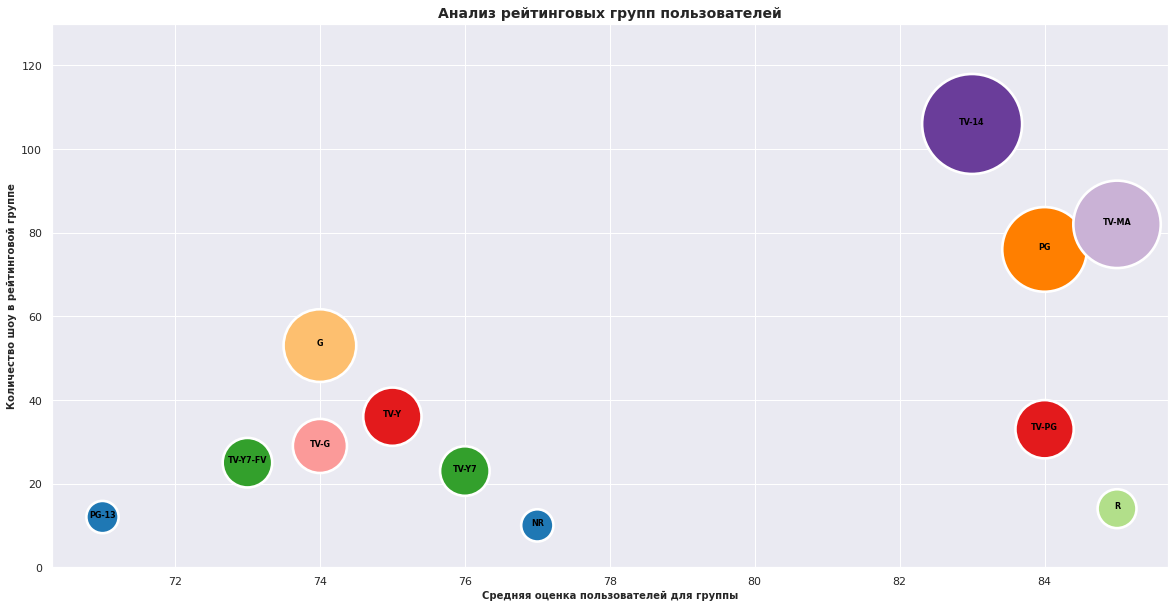

In [ ]:
# Пузырьковая диаграмма распределения шоу по группам: количество, средняя оценка, процент от всех групп
plt.figure(figsize=(20,10), facecolor = 'white')

ax = sns.scatterplot(
    x=rating_data['mean'],
     y=rating_data['count'],
      hue=rating_data['percentage'],
      size=rating_data['percentage'],
       legend=False,
        sizes=(100, 10000),
         palette="Paired"
         )

plt.ylim(0, 130)
plt.title("Анализ рейтинговых групп пользователей",fontsize=14,fontweight='semibold')
plt.xlabel("Средняя оценка пользователей для группы",fontsize=10,fontweight='semibold')
plt.ylabel("Количество шоу в рейтинговой группе",fontsize=10,fontweight='semibold')
for line in range(0,rating_data.shape[0]):
    ax.text(rating_data['mean'][line], rating_data['count'][line], rating_data['rating'][line], horizontalalignment='center', size=8, color='black', weight='semibold')
plt.show()

- 13 рейтиговых групп в датасете;
- UR группа представленна 1 шоу и не имеет оценок;
- 21% (106/500) шоу приходится на группу TV-14;
- 52% (264/500) шоу приходится на 3 группы TV-14, TV-MA, PG;
- шоу в группах R и TV-14 имеют самые высокие средние оценки.

Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) Аналитики и data-scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

# Braking Bad

In [ ]:
data[data['title'] == 'Breaking Bad']

,title,rating,ratingLevel,release year,user rating score
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0


In [ ]:
gr_TV_MA = data[data['rating'] == 'TV-MA']
gr_TV_MA.sort_values(['user rating score'], ascending=False).head(10)

,title,rating,ratingLevel,release year,user rating score
41,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
25,Marvel's Iron Fist,TV-MA,NaN,2017,98.0
62,Family Guy,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
72,Orange Is the New Black,TV-MA,For mature audiences. May not be suitable for...,2016,98.0
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0
69,Shameless (U.S.),TV-MA,For mature audiences. May not be suitable for...,2016,97.0
85,Ingobernable,TV-MA,NaN,2017,96.0
401,Dexter,TV-MA,For mature audiences. May not be suitable for...,2013,95.0
24,Marvel's Luke Cage,TV-MA,For mature audiences. May not be suitable for...,2016,95.0


## ТОП - 10 фильмов в категории TV-MA

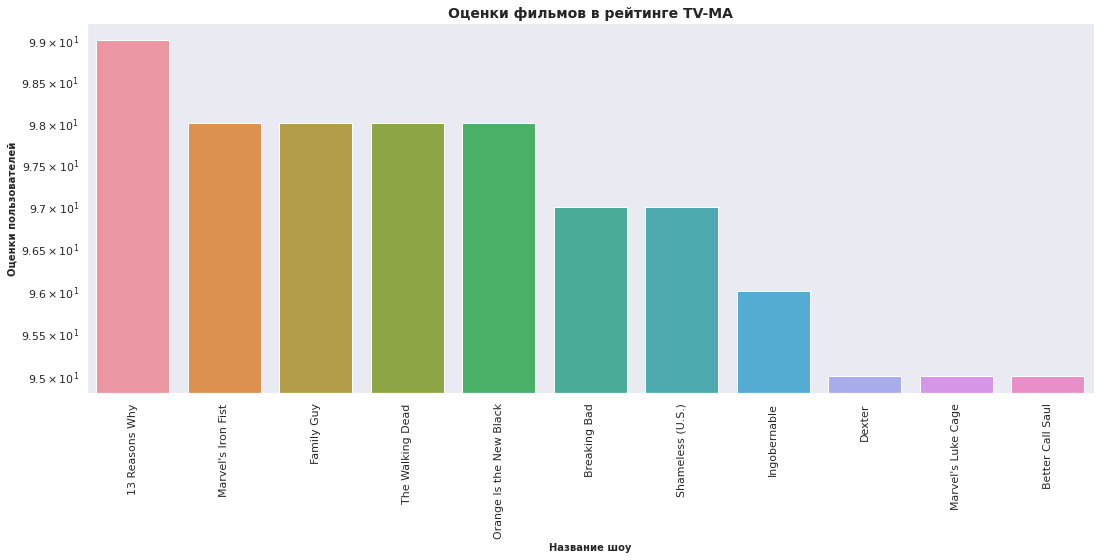

In [ ]:
sns.catplot(
    data=gr_TV_MA.sort_values(['user rating score'], ascending=False).iloc[0:11],
     x="title",
      y="user rating score",
       kind="bar",
       height= 6,
        aspect= 2.5
        )

plt.title("Оценки фильмов в рейтинге TV-MA",fontsize=14,fontweight='semibold')
plt.xlabel("Название шоу" ,fontsize=10,fontweight='semibold')
plt.ylabel("Оценки пользователей",fontsize=10,fontweight='semibold')
plt.locator_params(axis="y", nbins=40, tight=True)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [ ]:
#максимальная и минимальная оценка в рейтинге TV-MA
print("мин. оценка:", gr_TV_MA['user rating score'].min(),
      "макс. оценка:", gr_TV_MA['user rating score'].max(), sep='\n')

мин. оценка:
56.0
макс. оценка:
99.0


In [ ]:
gr_2013 = data[data['release year'] == 2013]
gr_2013.sort_values(['user rating score'], ascending=False).head(15)

,title,rating,ratingLevel,release year,user rating score
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0
401,Dexter,TV-MA,For mature audiences. May not be suitable for...,2013,95.0
115,The Client List,TV-14,Parents strongly cautioned. May be unsuitable ...,2013,92.0
407,Burn Notice,TV-14,Parents strongly cautioned. May be unsuitable ...,2013,85.0
20,Masha and the Bear,TV-Y,Suitable for all ages.,2013,81.0
65,The Secret Life of the American Teenager,TV-14,Parents strongly cautioned. May be unsuitable ...,2013,81.0
155,Raising Hope,TV-14,Parents strongly cautioned. May be unsuitable ...,2013,73.0
54,90210,TV-14,Parents strongly cautioned. May be unsuitable ...,2013,62.0
286,Safe Haven,PG-13,thematic material involving threatening behavi...,2013,62.0
325,Army Wives,TV-14,Parents strongly cautioned. May be unsuitable ...,2013,61.0


## ТОП - 10 за 2013 года

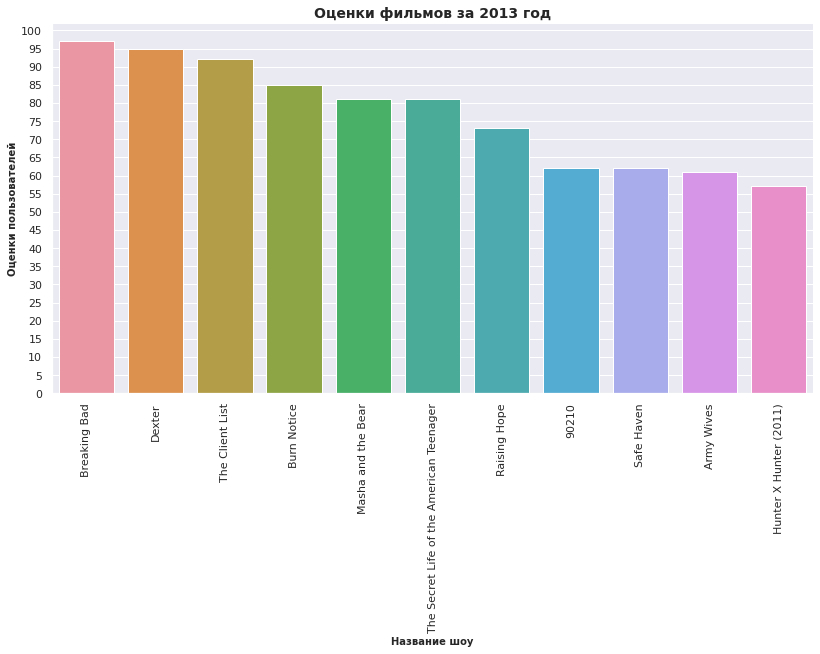

In [ ]:
sns.catplot(
    data=gr_2013.dropna().sort_values(['user rating score'], ascending=False)[:11],
     x="title",
      y="user rating score",
       kind="bar",
       height= 6,
        aspect= 2
        )

plt.title("Оценки фильмов за 2013 год",fontsize=14,fontweight='semibold')
plt.xlabel("Название шоу" ,fontsize=10,fontweight='semibold')
plt.ylabel("Оценки пользователей",fontsize=10,fontweight='semibold')
plt.locator_params(axis="y", nbins=40, tight=True)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print("мин. оценка за 2013 год:", gr_2013['user rating score'].min(),
      "макс. оценка за 2013 год:", gr_2013['user rating score'].max(), sep='\n')

мин. оценка за 2013 год:
57.0
макс. оценка за 2013 год:
97.0


In [ ]:
a = [99.0,98.0,97.0]
data_scored_max = data.loc[data['user rating score'].isin(a)]\
.sort_values(['user rating score'], ascending=False)
print(len(data_scored_max))
data_scored_max

25


,title,rating,ratingLevel,release year,user rating score
41,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
350,Lost,TV-14,Parents strongly cautioned. May be unsuitable ...,2010,98.0
88,Finding Dory,PG,mild thematic elements,2016,98.0
72,Orange Is the New Black,TV-MA,For mature audiences. May not be suitable for...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
63,Criminal Minds,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
62,Family Guy,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
64,Friends,TV-14,Parents strongly cautioned. May be unsuitable ...,2003,98.0
27,The Flash,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0


## ТОП - 25 фильмов

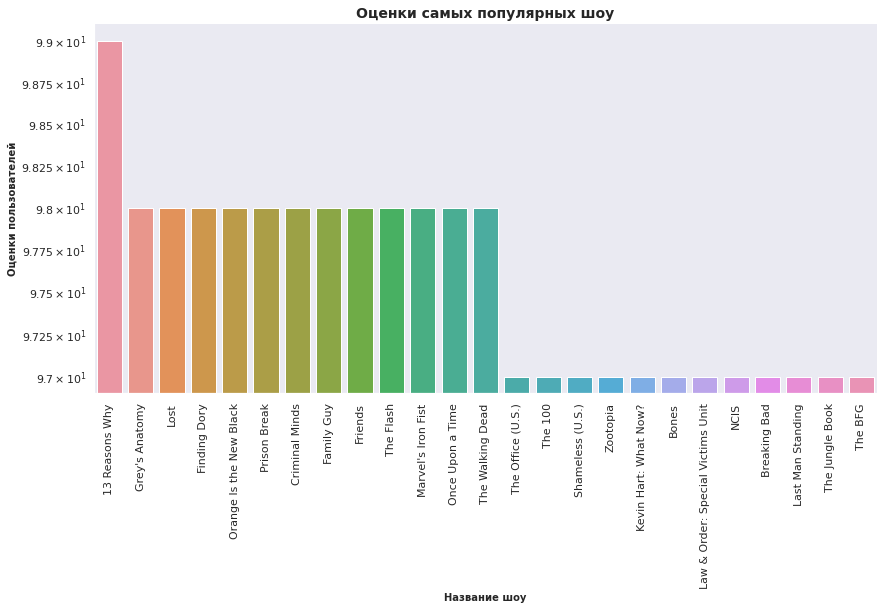

In [ ]:
sns.catplot(data=data_scored_max, x="title", y="user rating score", kind="bar" , height= 6 , aspect= 2)

plt.title("Оценки самых популярных шоу",fontsize=14,fontweight='semibold')
plt.xlabel("Название шоу" ,fontsize=10,fontweight='semibold')
plt.ylabel("Оценки пользователей",fontsize=10,fontweight='semibold')
plt.locator_params(axis="y", nbins=25, tight=True)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

**Braeking Bad**
- ТОП - 25 шоу за всю историю
- ТОП - 3 по частоте оценок
- №6 в ТОП-10 категории TV-MA
- №1 в ТОП-10 за 2013 год

